# Projet Hackathon : Quelle(s) énergie(s) pour demain ? 

L'objet de l'étude était de prévoir au niveau mondial quelle serait l'énergie de demain.
Nous avons récupéré sur les trente dernières années la consommation mondiale par pays et par énergie. 
Nous avons voulu être le plus exhaustif possible en traitant les énergies suivantes :
* Pétrole
* Gaz
* Charbon
* Nucléaire
* Hydraulique
* Solaire
* Energie renouvelable
* Vent

## Imports 

In [230]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
sns.set()

## Open datas 

In [231]:
dataPath ='/'.join(os.getcwd().split("/")[:-1])+"/data/"

### Oil production

In [247]:
oil_production = pd.read_excel(dataPath+"data_production.xlsx", 1,  header = 2)

In [233]:
def clean (df, unite) :
    indexUSSR = np.where(df[unite]=="USSR")[0][0]
    indexRussie = np.where(df[unite]=="Russian Federation")[0][0]
    df.iloc[indexUSSR] = df.iloc[indexUSSR].fillna(0) + df.iloc[indexRussie].fillna(0)
    df = df.dropna(thresh= len(df.columns)-20).fillna(0)
    return df

def separate_total(df, unite) :
    df_tot = pd.DataFrame(df[df[unite].str.contains("Total")]).set_index(unite)
    df = df[df[unite].str.contains("Total") == False].set_index(unite)
    return df_tot, df

def print_df(df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,pays in enumerate(df.index) :   
        plt.plot(df.columns.values[:-5], df.iloc[k][:-5], label=f"{pays}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()
    
def set_name_df(df,name) :
    df.name = name
    return df

In [234]:
unite = "Million tonnes"
oil_production = clean(oil_production,unite)
oil_production_total, oil_production = separate_total(oil_production,unite)
oil_production_total, oil_production = set_name_df(oil_production_total, "Total oil"), set_name_df(oil_production_total, "Oil")

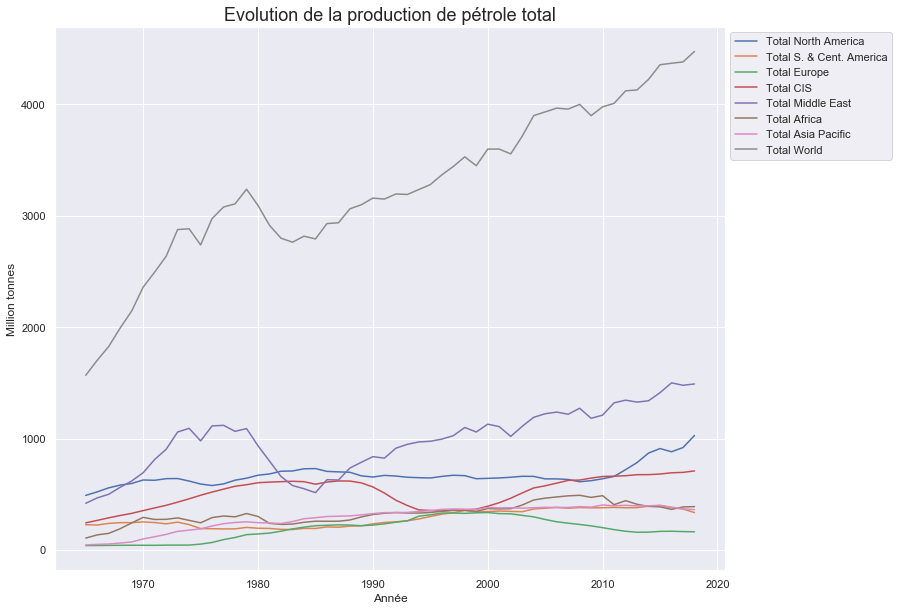

In [235]:
print_df(oil_production_total, "Evolution de la production de pétrole total", unite)

### Gaz production

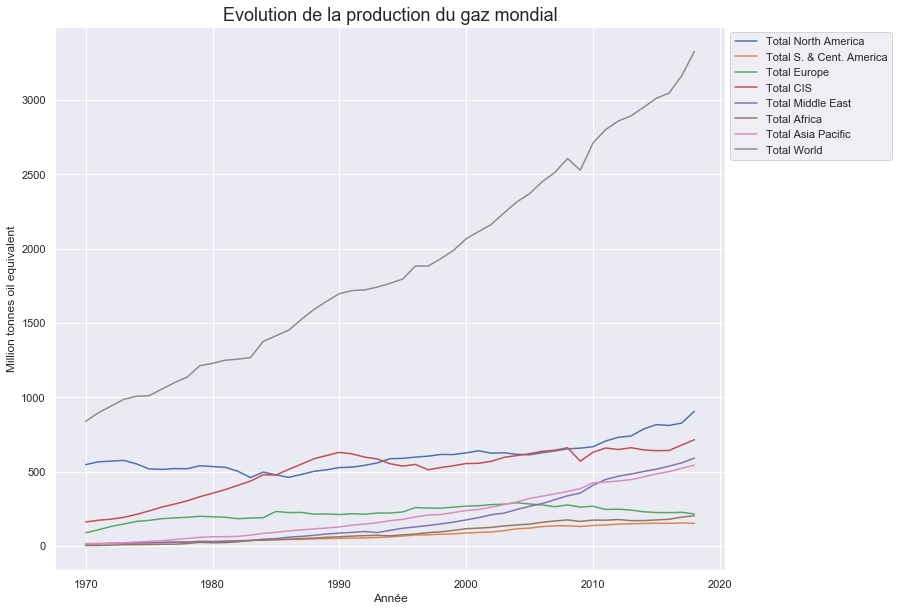

In [236]:
gaz_production = pd.read_excel(dataPath+"data_production.xlsx", 5, header = 2)
unite = "Million tonnes oil equivalent"
gaz_production = clean(gaz_production, unite)
gaz_production_total, gaz_production = separate_total(gaz_production, unite)
gaz_production_total, gaz_production = set_name_df(gaz_production_total, "Total gaz"), set_name_df(gaz_production_total, "gaz")
print_df(gaz_production_total, "Evolution de la production du gaz mondial", unite)

### Coal production 

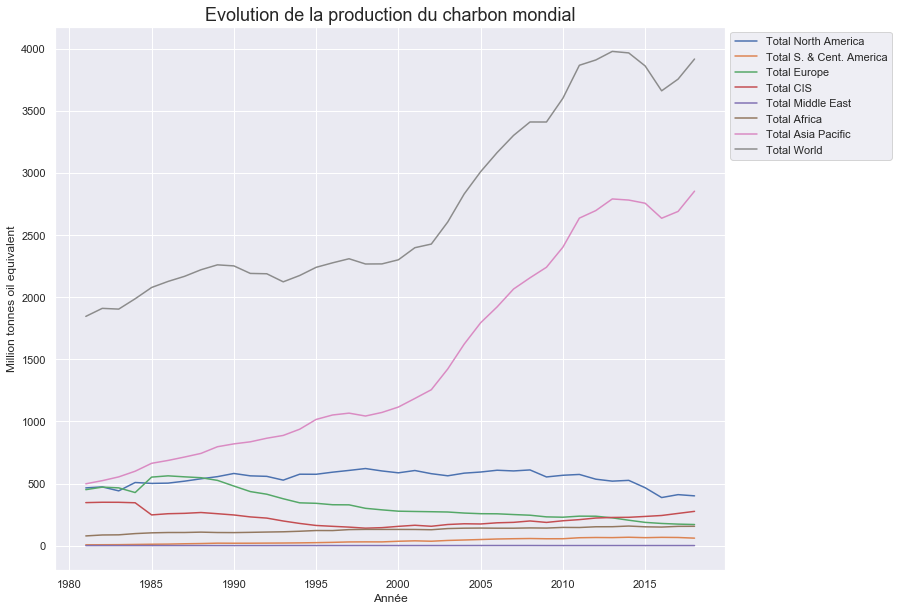

In [237]:
coal_production = pd.read_excel(dataPath+"data_production.xlsx", 7, header = 2)
unite = "Million tonnes oil equivalent"
coal_production = clean(coal_production,unite)
coal_production_total, coal_production = separate_total(coal_production, unite)
coal_production_total, coal_production = set_name_df(coal_production_total, "Total coal"), set_name_df(coal_production_total, "coal")
print_df(coal_production_total, "Evolution de la production du charbon mondial", unite)

### Nuclear : 

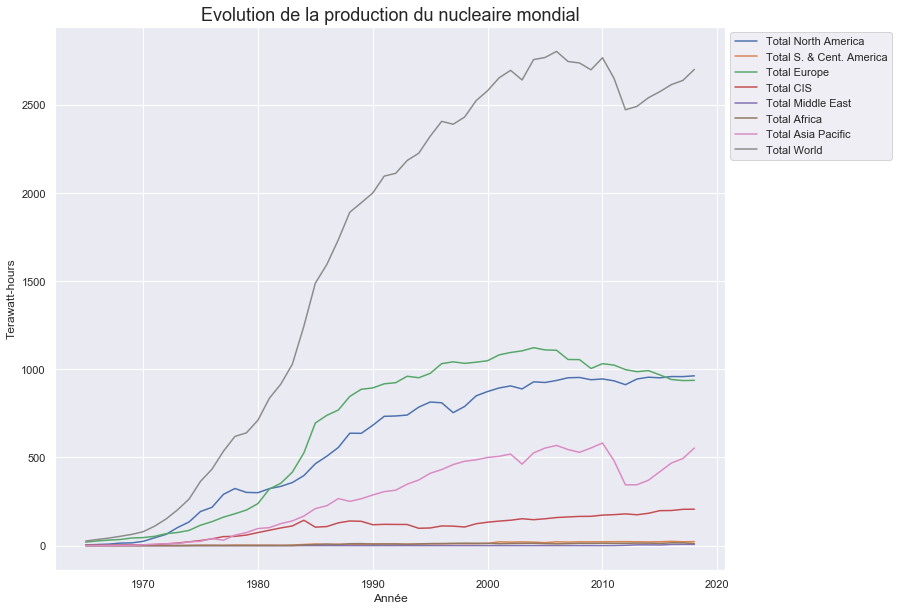

In [238]:
nuclear_production = pd.read_excel(dataPath+"data_production.xlsx", 8, header = 2)
unite = "Terawatt-hours"
nuclear_production = clean(nuclear_production,unite)
nuclear_production_total, nuclear_production = separate_total(nuclear_production, unite)
nuclear_production_total, nuclear_production = set_name_df(nuclear_production_total, "Total nuclear"), set_name_df(nuclear_production_total, "nuclear")
print_df(nuclear_production_total, "Evolution de la production du nucleaire mondial", unite)

### Hydro-generation 

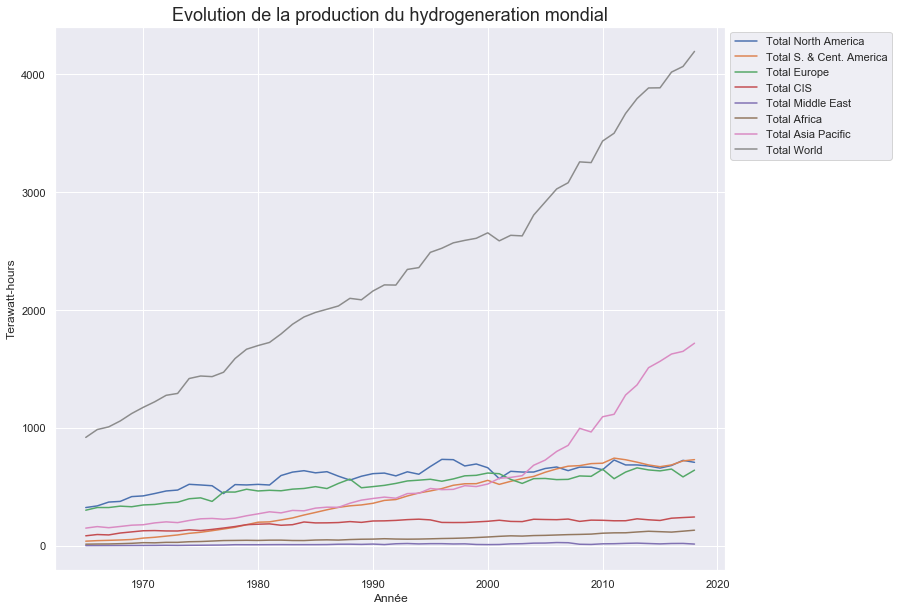

In [239]:
hydro_production = pd.read_excel(dataPath+"data_production.xlsx", 9, header = 2)
unite = "Terawatt-hours"
hydro_production = clean(hydro_production,unite)
hydro_production_total, hydro_production = separate_total(hydro_production, unite)
hydro_production_total, hydro_production = set_name_df(hydro_production_total, "Total hydro"), set_name_df(hydro_production_total, "hydro")
print_df(hydro_production_total, "Evolution de la production du hydrogeneration mondial", unite)

### Energie renouvelable : 


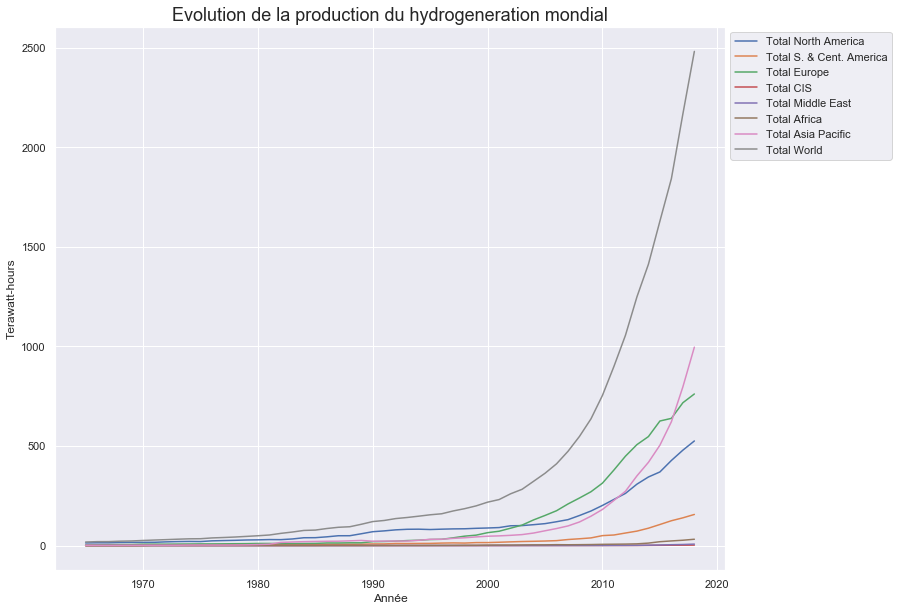

In [240]:
renewable_production = pd.read_excel(dataPath+"data_production.xlsx", 10, header = 2)
unite = "Terawatt-hours"
renewable_production = clean(renewable_production,unite)
renewable_production_total, renewable_production = separate_total(renewable_production, unite)
renewable_production_total, renewable_production = set_name_df(renewable_production_total, "Total renewable"), set_name_df(renewable_production_total, "renewable")
print_df(renewable_production_total, "Evolution de la production du hydrogeneration mondial", unite)

### Solaire : 


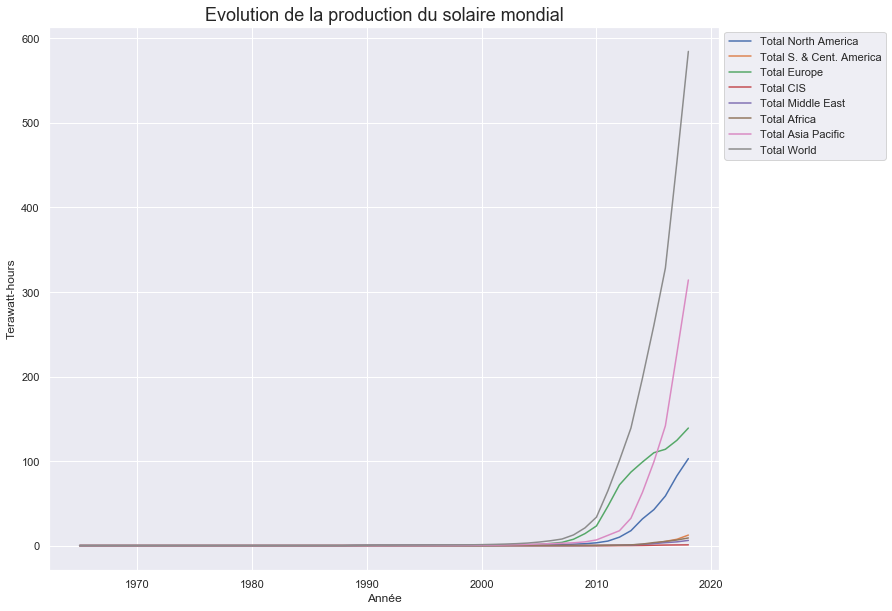

In [241]:
solar_production = pd.read_excel(dataPath+"data_production.xlsx", 12, header = 2)
unite = "Terawatt-hours"
solar_production = clean(solar_production,unite)
solar_production_total, solar_production = separate_total(solar_production, unite)
solar_production_total, solar_production = set_name_df(solar_production_total, "Total solar"), set_name_df(solar_production_total, "solar")
print_df(solar_production_total, "Evolution de la production du solaire mondial", unite)

### Wind 

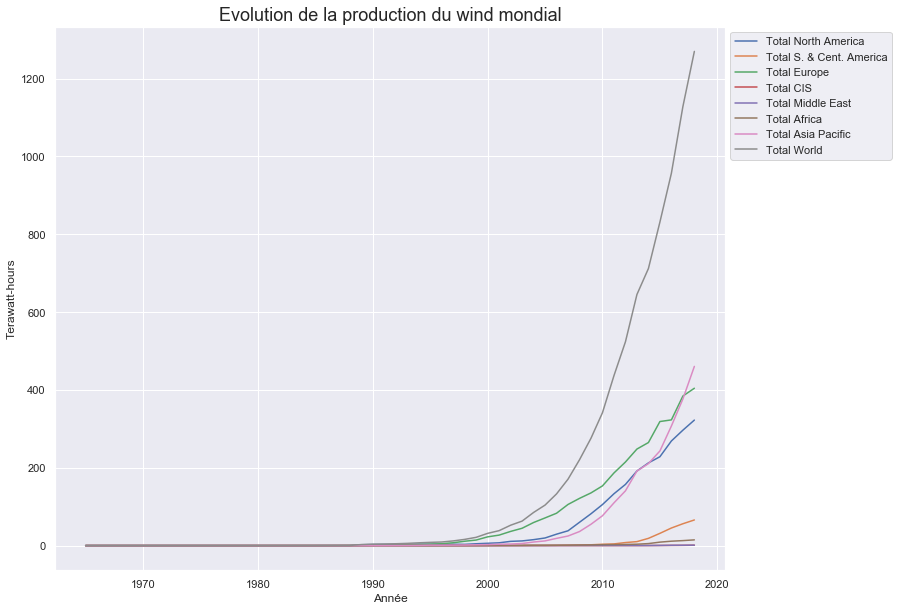

In [242]:
wind_production = pd.read_excel(dataPath+"data_production.xlsx", 13, header = 2)
unite = "Terawatt-hours"
wind_production = clean(wind_production,unite)
wind_production_total, wind_production = separate_total(wind_production, unite)
wind_production_total, wind_production = set_name_df(wind_production_total, "Total wind"), set_name_df(wind_production_total, "wind")

print_df(wind_production_total, "Evolution de la production du wind mondial", unite)

### Biomass :

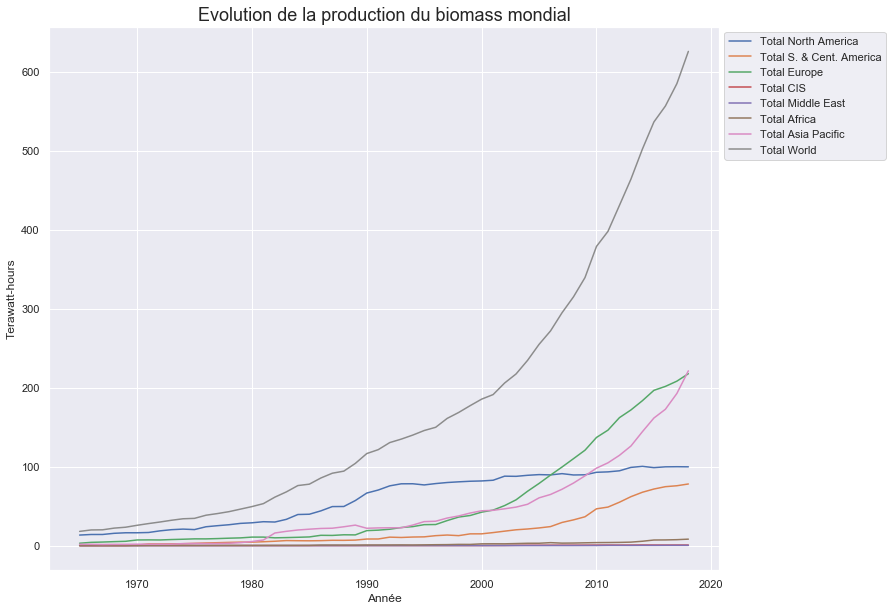

In [243]:
biomass_production = pd.read_excel(dataPath+"data_production.xlsx", 14, header = 2)
unite = "Terawatt-hours"
biomass_production = clean(biomass_production,unite)
biomass_production_total, biomass_production = separate_total(biomass_production, unite)
biomass_production_total, biomass_production = set_name_df(biomass_production_total, "Total biomass"), set_name_df(biomass_production_total, "biomass")
print_df(biomass_production_total, "Evolution de la production du biomass mondial", unite)


### Total :

In [244]:
def print_tot(list_df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,df in enumerate(list_df) :   
        plt.plot(df.columns.values[:-5], df.iloc[-1][:-5], label=f"{df.name}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()

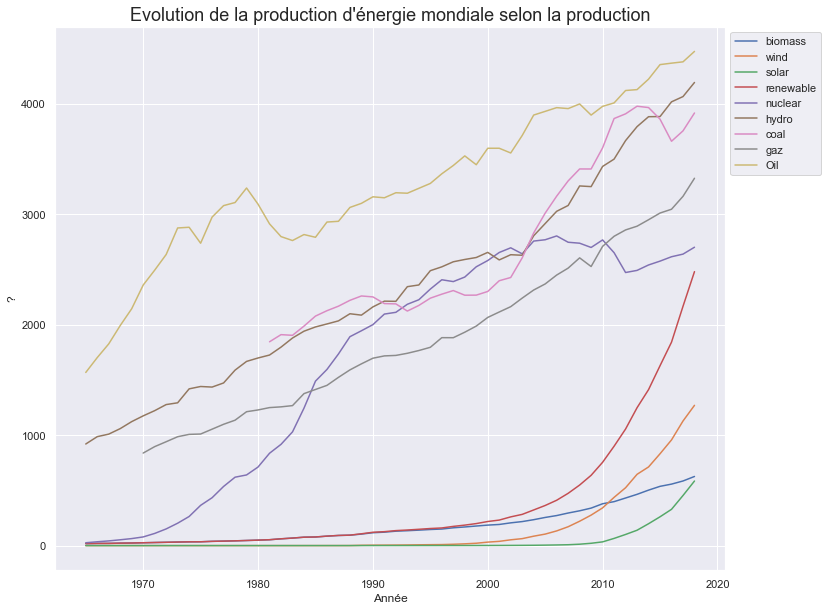

In [188]:
dfs= [biomass_production,wind_production,solar_production, renewable_production, 
           nuclear_production, hydro_production,coal_production, gaz_production, oil_production]
print_tot(dfs,
         title = "Evolution de la production d'énergie mondiale selon la production", 
         unite="?")

In [276]:
dfs= [biomass_production_total,wind_production_total,solar_production_total, renewable_production_total, 
           nuclear_production_total, hydro_production_total,coal_production_total, gaz_production_total, oil_production_total]


In [292]:
min_date = min(coal_production.T.index.values[:-5].astype(int))

def reshape_data (df) :
    df_copy = df.copy()
    df_copy = df_copy.T
    df_copy = df_copy.reset_index()
    df_copy = df_copy [:-5]
    header = np.array(df_copy.columns)
    header[0] = 'Date'
    df_copy = df_copy[1:]
    df_copy.columns = header
    df_copy = df_copy.melt(id_vars=['Date'], value_name=df.name)
    df_copy = df_copy[df_copy["Date"]>min_date]
    df_copy.name = df.name
    return df_copy

def concat_sources (dfs) :
    dataframes = []
    for df in dfs : 
        dataframes.append(reshape_data(df))
    return_df = dataframes[0]
    for df in dataframes[1:] :
        return_df=return_df.merge(df, on=["Date", "variable"])
    return return_df

t =  concat_sources(dfs)
t_copy = t.copy()
t=t.melt(id_vars=['Date', 'variable'], var_name="Energy", value_name = "Production")
t.Production=t.Production.astype(float)
t.Date=t.Date.astype(int)

In [293]:
np.unique(t.variable.values)

array(['Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Europe',
       'Total Middle East', 'Total North America',
       'Total S. & Cent. America', 'Total World'], dtype=object)

In [294]:
t.variable = t.variable.str.replace("Total ","").str.replace('S. & Cent. America',"Latin America").str.replace("CIS", "Russia")


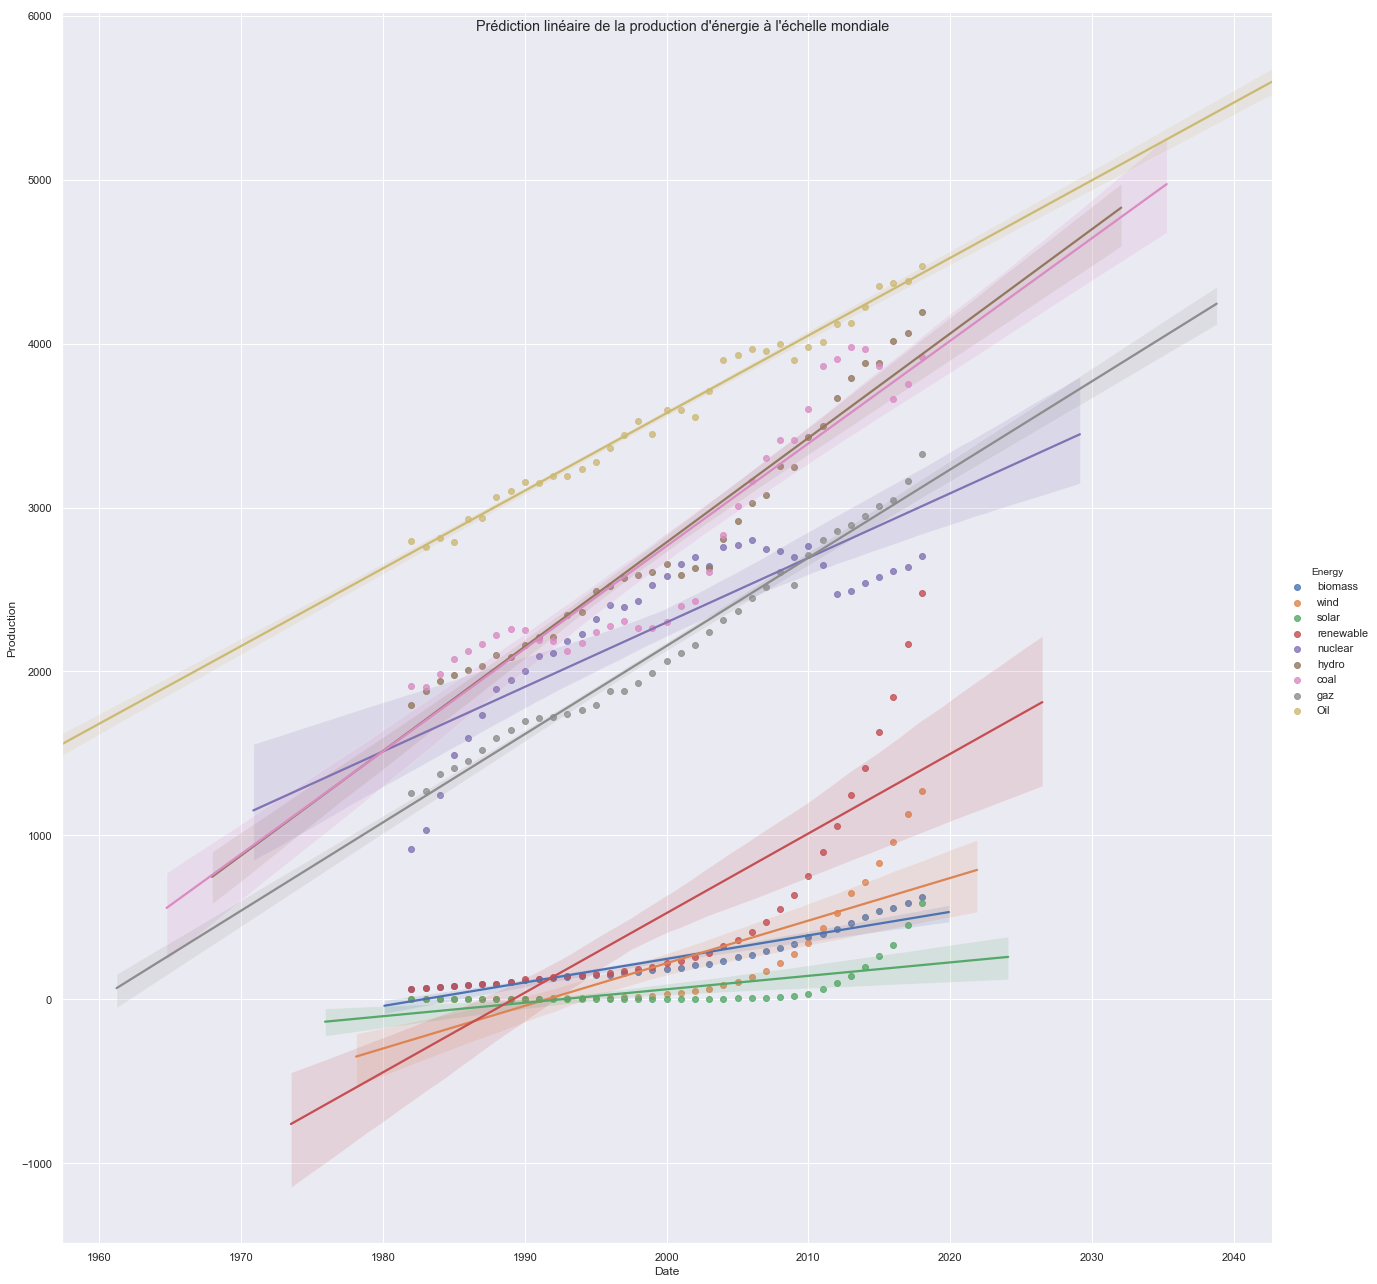

In [296]:
import seaborn as sns; sns.set(color_codes=True)
t_world=t[t["variable"]=="World"]
g = sns.lmplot(x="Date", y="Production", hue="Energy", data=t_world, height=18).fig.suptitle("Prédiction linéaire de la production d'énergie à l'échelle mondiale")


In [297]:
production_energy_by_region = t.rename(columns={"variable":"Country"}).copy()
dataPath ='/'.join(os.getcwd().split("/")[:-1])

demographic_grouped = pd.read_csv(dataPath+"/demographic_grouped.csv" )

In [298]:
merged_data = pd.merge(production_energy_by_region,demographic_grouped, on=["Date","Country"])

In [305]:
merged_data_cleaned = merged_data.copy()

In [306]:
merged_data_cleaned=merged_data_cleaned.drop(["Access to Electricity", "Nitrous Oxyd Emission", "Methan Oxyd Emission"], axis =1)

In [307]:
 merged_data_cleaned.Country.unique()

array(['North America', 'Latin America', 'Europe', 'Russia',
       'Middle East', 'Africa', 'Asia Pacific', 'World'], dtype=object)

In [308]:
merged_data_cleaned[merged_data_cleaned["Production"].isna()]

,Date,Country,Energy,Production,Urban Population,Population Growth,Population,GDP in $,CO2 Emission


In [386]:
for energy in merged_data_cleaned.Energy.unique() :
    temp = merged_data_cleaned[merged_data_cleaned.Energy == energy]
    temp.to_csv(pathToSave+"/production_"+energy+".csv")


In [367]:
merged_data_cleaned.Country.unique()

array(['North America', 'Latin America', 'Europe', 'Russia',
       'Middle East', 'Africa', 'Asia Pacific', 'World'], dtype=object)

In [384]:
from sklearn.preprocessing import PolynomialFeatures
for country in merged_data_cleaned.Country.unique() : 
    poly = PolynomialFeatures(3)
    data = merged_data_cleaned[merged_data_cleaned.Country == country]
    X_train = data[data.Date<2015].Date
    y_train = data[data.Date<2015]["CO2 Emission"]
    X_test = data[data.Date>=2015].Date
    X_new = poly.fit_transform(X_train.values.reshape(-1,1))
    reg = LinearRegression().fit(X_new, y_train)
    y_pred=reg.predict(poly.fit_transform(X_test.values.reshape(-1,1)))
    y = np.append(y_train,y_pred)
    data.loc[:,"CO2 Emission"] = y
    merged_data_cleaned[merged_data_cleaned.Country == country] = data


/home/kevin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kevin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kevin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [385]:
pathToSave = '/'.join(os.getcwd().split("/")[:-1])
merged_data_cleaned.to_csv(pathToSave+"/Co2_predicted.csv")

In [ ]:


svregression.fit(X_train[features_lasso], Y_train)
prediction_svm = svregression.predict(X_test[features_lasso])
residu_svm = Y_test-prediction_svm
plt.hist(residu_svm)
print("SVM : MSE :",mean_squared_error(Y_test,prediction_svm))
print("SVM : R2 =", svregression.score(X_test[features_lasso],Y_test))

In [ ]:
from sklearn.svm import SVR
for energy in merged_data_cleaned.Energy.unique() :
    temp = merged_data_cleaned[merged_data_cleaned.Energy == energy]
    svregression = SVR(kernel='sigmoid', gamma='auto').fit()
    

In [387]:
merged_data_cleaned

,Date,Country,Energy,Production,Urban Population,Population Growth,Population,GDP in $,CO2 Emission
0,1982,North America,biomass,29.840049,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
1,1982,North America,wind,0.000000,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
2,1982,North America,solar,0.000000,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
3,1982,North America,renewable,29.840049,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
4,1982,North America,nuclear,335.998765,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
5,1982,North America,hydro,596.337982,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
6,1982,North America,coal,472.807992,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
7,1982,North America,gaz,502.398366,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
8,1982,North America,Oil,706.300468,1.906413e+08,0.981134,2.568364e+08,3.658081e+12,4.721956e+06
9,1983,North America,biomass,33.242599,1.928029e+08,0.925877,2.592144e+08,3.975475e+12,4.751017e+06
